In [1]:
import pandas as pd
from random import *
import cv2
import urllib.request
import matplotlib.pyplot as plt
import threading
import os
import numpy as np
import matplotlib
import random

In [47]:
faces_df = pd.read_table("faces_subset.txt", names=['name','int1','int2', 'link' ,'number', 'misc'])

faces_df['file_name']=faces_df['name'].str.split().str[0]+"_"+faces_df['name'].str.split().str[1]+faces_df['int1'].map(str)+ "."+faces_df['link'].str.split('.').str[-1]
faces_df.head(10)

,name,int1,int2,link,number,misc,file_name
0,Aaron Eckhart,1,1,http://upload.wikimedia.org/wikipedia/commons/...,"53,177,418,542",dec996994cf1eec33b53c203cff0e8f25638829fa2ad71...,Aaron_Eckhart1.jpg
1,Aaron Eckhart,2,2,http://movies.dosthana.com/sites/default/files...,"80,102,260,282",f84d0c3b1b854a51e6bc031bc353e801834e81df795e85...,Aaron_Eckhart2.jpg
2,Aaron Eckhart,3,3,http://upload.wikimedia.org/wikipedia/commons/...,"203,802,975,1574",8548658ef00f2ac4c384fbfff9d3ae225b4b9e0c2aa45e...,Aaron_Eckhart3.jpg
3,Aaron Eckhart,4,4,http://25.media.tumblr.com/nJ2vga5sae9o2ks4Flt...,"62,90,231,259",658d83f35859d2f313ff660c1900427c21eae1c41e3035...,Aaron_Eckhart4.jpg
4,Aaron Eckhart,5,5,http://upload.wikimedia.org/wikipedia/commons/...,"276,120,492,336",1fa14fed3371280e8785df42cdc5d0335e7923a38f1b06...,Aaron_Eckhart5.jpg
5,Aaron Eckhart,6,6,http://media.zenfs.com/en_us/Movies/PhotoG/2nd...,"235,158,540,463",121e8bea5caae215b537dc116534bbd2fa7a9a60c19107...,Aaron_Eckhart6.jpg
6,Aaron Eckhart,7,7,http://img2.timeinc.net/people/i/2008/news/080...,"60,57,178,175",bb2e227a9420d6325b67974231d334fc4620e807543a16...,Aaron_Eckhart7.jpg
7,Aaron Eckhart,8,8,http://latimesblogs.latimes.com/photos/uncateg...,"30,149,326,445",4937ad41d13c493f6b1bd5dfd560c3b2a4bf3fdeb97315...,Aaron_Eckhart8.jpg
8,Aaron Eckhart,9,9,http://collider.com/wp-content/uploads/Aaron-E...,"697,733,1878,1914",3705523152829d26aa5691a81f61f4708d10231a6c5b97...,Aaron_Eckhart9.jpg
9,Aaron Eckhart,10,10,http://movies.dosthana.com/sites/default/files...,"375,157,571,353",0ffd2e7003856122e275ec621cba760e05db0a42a7e453...,Aaron_Eckhart10.jpg


In [61]:
def timeout(args=(), kwargs={}, timeout_duration=30, default=None):
    '''From:
    http://code.activestate.com/recipes/473878-timeout-function-using-threading/'''
    
    class InterruptableThread(threading.Thread):
        def __init__(self):
            threading.Thread.__init__(self)
            self.result = None

        def run(self):
            try:
                urllib.request.urlretrieve(*args)
            except:
                self.result = default

    it = InterruptableThread()
    it.start()
    it.join(timeout_duration)
      
    if it.isAlive():
        return False
    else:
        return it.result


In [9]:
faces_df.apply(lambda x: timeout(args=(x['link'], "./uncropped/"+x['file_name'])), axis=1)

0       None
1       None
2       None
3       None
4       None
5       None
6       None
7       None
8       None
9       None
10      None
11      None
12      None
13      None
14      None
15      None
16      None
17      None
18      None
19      None
20      None
21      None
22      None
23      None
24      None
25      None
26      None
27      None
28      None
29      None
        ... 
2135    None
2136    None
2137    None
2138    None
2139    None
2140    None
2141    None
2142    None
2143    None
2144    None
2145    None
2146    None
2147    None
2148    None
2149    None
2150    None
2151    None
2152    None
2153    None
2154    None
2155    None
2156    None
2157    None
2158    None
2159    None
2160    None
2161    None
2162    None
2163    None
2164    None
Length: 2165, dtype: object

In [151]:
## TODO: write the crop function
#faces['x1'], faces['y1'], faces['x2'], faces['y2'] = faces['number'].str.split(',', 3).str
## I use a try-except method to return None if the image does not exist in the "uncropped" folder
###    check=os.path.isfile('./uncropped/'+filename)
def crop(filename, param):
    check=os.path.isfile('./uncropped/'+filename)
    if check==True:    
        img = cv2.imread('./uncropped/'+filename, flags=0) 
        x1, y1, x2, y2 = param.split(',',3)
        crop_img = img[int(y1):int(y2), int(x1):int(x2)]
        scale_img = cv2.resize(crop_img, (64,64))
        cv2.imwrite('./cropped/'+filename, scale_img)
    else:
        pass


In [16]:
def crop(filename, param):
    try:
        img = cv2.imread('./uncropped/'+filename, flags=0) 
        x1, y1, x2, y2 = param.split(',',3)
        crop_img = img[int(y1):int(y2), int(x1):int(x2)]
        scale_img = cv2.resize(crop_img, (64,64))
        cv2.imwrite('./cropped/'+filename, scale_img)  
    except:
        pass

In [103]:
faces_df.apply(lambda x: crop(x['file_name'],x['number']), axis=1)

/Users/Sarah/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


0       None
1       None
2       None
3       None
4       None
5       None
6       None
7       None
8       None
9       None
10      None
11      None
12      None
13      None
14      None
15      None
16      None
17      None
18      None
19      None
20      None
21      None
22      None
23      None
24      None
25      None
26      None
27      None
28      None
29      None
        ... 
2135    None
2136    None
2137    None
2138    None
2139    None
2140    None
2141    None
2142    None
2143    None
2144    None
2145    None
2146    None
2147    None
2148    None
2149    None
2150    None
2151    None
2152    None
2153    None
2154    None
2155    None
2156    None
2157    None
2158    None
2159    None
2160    None
2161    None
2162    None
2163    None
2164    None
Length: 2165, dtype: object

In [48]:
## TODO: write the normalize function
def normalize(im):
    return cv2. normalize(im.astype('float'), None, 0., 1., cv2.NORM_MINMAX)
## TODO: write the load_image function

def load_image(filename, path='cropped/'):
    try:
        crop = cv2.imread(path + filename, flags=0)
        norm = normalize(crop)
        flat = norm.flatten()
        return(flat)
    except:
        return pd.Series()
    
## TODO: write the load_image_flip function
def load_image_flip(filename, path='cropped/'):
    try:
        img=load_image(filename)  
        img_fp = np.flipud([img,img])
        return(img_fp[0])
    except:
        return pd.Series()

## TODO: create a new data frame where you store all the images in a flat and normalized format
## TODO: create a new column in this data frame to store the names of each actor
image_df = list(faces_df["file_name"].apply(load_image))
fp_image_df=list(faces_df["file_name"].apply(load_image_flip))

In [49]:
temp=pd.DataFrame([image_df,fp_image_df]).transpose()
temp=(temp[0]+temp[1])/2
df = pd.DataFrame(temp.values.tolist())
col_avg= np.mean(df,0)
face_plot=np.reshape(col_avg, (64,64))

/Users/macbookproi7/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


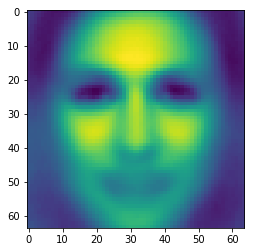

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(face_plot)


In [51]:
df['names']=faces_df['name']
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,names
0,0.773481,0.596685,0.486188,0.464088,0.475138,0.508287,0.441989,0.414365,0.375691,0.309392,...,0.375691,0.243094,0.248619,0.243094,0.232044,0.226519,0.215470,0.281768,0.265193,Aaron Eckhart
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aaron Eckhart
2,0.036000,0.032000,0.048000,0.044000,0.028000,0.124000,0.052000,0.112000,0.064000,0.108000,...,0.404000,0.452000,0.372000,0.408000,0.388000,0.272000,0.308000,0.284000,0.300000,Aaron Eckhart
3,0.343348,0.244635,0.103004,0.120172,0.158798,0.231760,0.201717,0.188841,0.150215,0.188841,...,0.463519,0.587983,0.678112,0.751073,0.995708,0.068670,0.090129,0.120172,0.107296,Aaron Eckhart
4,0.221739,0.173913,0.130435,0.139130,0.178261,0.182609,0.247826,0.308696,0.334783,0.365217,...,0.221739,0.217391,0.208696,0.191304,0.165217,0.143478,0.134783,0.139130,0.147826,Aaron Eckhart
5,0.631579,0.680162,0.724696,0.291498,0.396761,0.194332,0.380567,0.396761,0.388664,0.283401,...,0.052632,0.048583,0.056680,0.044534,0.040486,0.052632,0.044534,0.040486,0.064777,Aaron Eckhart
6,0.434426,0.340164,0.303279,0.766393,0.237705,0.340164,0.286885,0.245902,0.331967,0.278689,...,0.545082,0.459016,0.319672,0.336066,0.348361,0.352459,0.364754,0.418033,0.434426,Aaron Eckhart
7,0.027027,0.049550,0.022523,0.108108,0.108108,0.067568,0.189189,0.234234,0.202703,0.274775,...,0.319820,0.211712,0.337838,0.500000,0.527027,0.490991,0.472973,0.445946,0.396396,Aaron Eckhart
8,0.000000,0.004673,0.018692,0.000000,0.014019,0.000000,0.032710,0.051402,0.032710,0.018692,...,0.411215,0.794393,0.995327,0.995327,0.962617,0.990654,0.981308,0.985981,0.943925,Aaron Eckhart
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aaron Eckhart


In [52]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [53]:
df.dropna(axis=0,inplace=True)

In [54]:
y=LabelEncoder().fit_transform(df['names'])
x=df.drop('names',1)

In [10]:
rf = RandomForestClassifier(n_estimators=100,max_features=randint(0,4095),)
rf.fit(x,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=1929, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [20]:
rf = RandomForestClassifier(n_estimators=100)

Ms=np.arange(1, len(df.columns),200)
oob=[]

for m in Ms:
    rf.set_params(max_features=m,oob_score=True, n_jobs=-1)
    rf.fit(x, y)
    oob.append(rf.oob_score_)

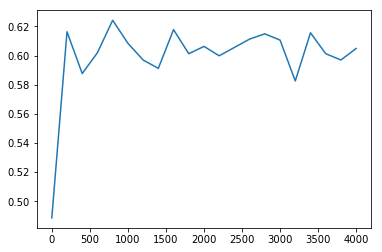

In [26]:
import matplotlib.pyplot as plt
#OOB=oob.loc[Ms[1]][1:len(oob)]
#OOB=pd.DataFrame(OOB).sort_index(axis=0)
plt.plot(Ms,oob)

In [182]:
rfc = RandomForestClassifier(n_estimators=1000, max_features=250, oob_score=True, n_jobs=-1)
rfc.fit(x, y)
rfc.oob_score_
imp_val = rfc.feature_importances_


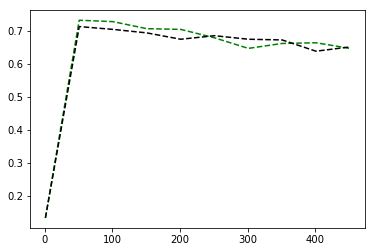

In [55]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Ns=np.arange(1,500,50)
p1=p2=[]
le = LabelEncoder()
le.fit(df['names'])

pipee1 = []
pipee2 = []
x= df.drop(labels='names', axis=1)

for n in Ns:
    ## TODO: Set a pipeline of PCA and Random forest and another of StandardScaler, PCA and Random forest
    scaler = StandardScaler()
    pca = PCA(n_components=n, whiten=True)
    rfc = RandomForestClassifier(n_estimators=1000, max_features=0.0488, n_jobs=-1)
    
    pipe1 = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('randomForest', rfc)])
    pipe2 = Pipeline(steps=[('pca', pca), ('randomForest', rfc)])

    ## TODO: Compute the 10 fold-CV accuracy with stratified sampling for different values of n_components 
    y_input = le.transform(df['names'])

    score1 = cross_val_score(pipe1, x, y_input, scoring="accuracy")
    pipee1.append(score1[0].mean())
    score2 = cross_val_score(pipe2, x, y_input, scoring="accuracy")        
    pipee2.append(score2[0].mean())
                           
## TODO: Plot the accuracy as a function of n_components
import numpy as np
import matplotlib.pyplot as plt


plt.plot(Ns, pipee1, 'g--', Ns, pipee2, 'k--')
plt.show()
    


In [13]:
pca=PCA(n_components=50)

In [14]:
pca.fit(x,y)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [15]:
samp_faces=pd.DataFrame(pca.components_[0:10])

In [18]:
f_plot=np.reshape(samp_faces.loc[0], (64,64))
f_plot1=np.reshape(samp_faces.loc[1], (64,64))
f_plot2=np.reshape(samp_faces.loc[2], (64,64))
f_plot3=np.reshape(samp_faces.loc[3], (64,64))
f_plot4=np.reshape(samp_faces.loc[4], (64,64))
f_plot5=np.reshape(samp_faces.loc[5], (64,64))
f_plot6=np.reshape(samp_faces.loc[6], (64,64))
f_plot7=np.reshape(samp_faces.loc[7], (64,64))
f_plot8=np.reshape(samp_faces.loc[8], (64,64))
f_plot9=np.reshape(samp_faces.loc[9], (64,64))



/Users/macbookproi7/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


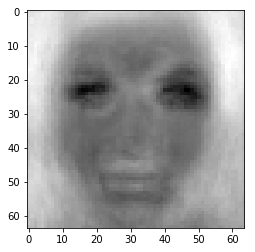

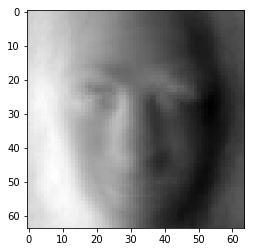

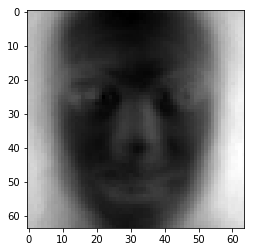

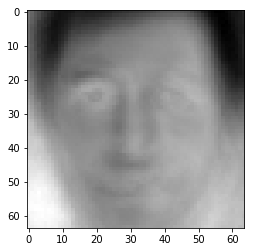

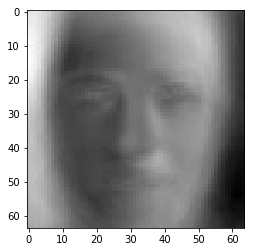

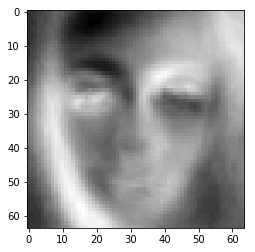

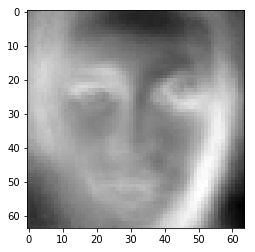

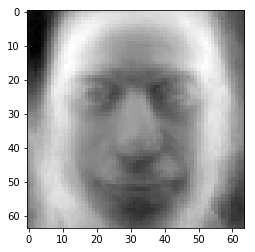

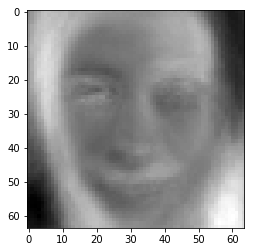

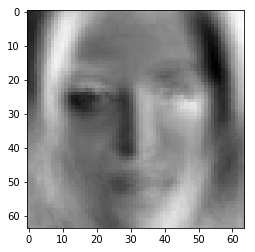

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(f_plot, cmap=plt.get_cmap('gray'))
plt.show()
plt.imshow(f_plot1, cmap=plt.get_cmap('gray'))
plt.show()
plt.imshow(f_plot2, cmap=plt.get_cmap('gray'))
plt.show()
plt.imshow(f_plot3, cmap=plt.get_cmap('gray'))
plt.show()
plt.imshow(f_plot4, cmap=plt.get_cmap('gray'))
plt.show()
plt.imshow(f_plot5, cmap=plt.get_cmap('gray'))
plt.show()
plt.imshow(f_plot6, cmap=plt.get_cmap('gray'))
plt.show()
plt.imshow(f_plot7, cmap=plt.get_cmap('gray'))
plt.show()
plt.imshow(f_plot8, cmap=plt.get_cmap('gray'))
plt.show()
plt.imshow(f_plot9, cmap=plt.get_cmap('gray'))
plt.show()

/Users/macbookproi7/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


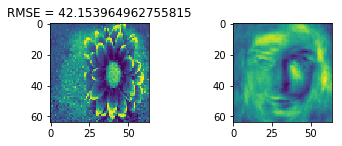

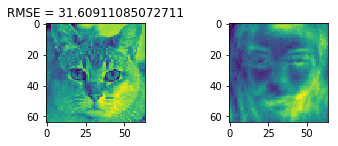

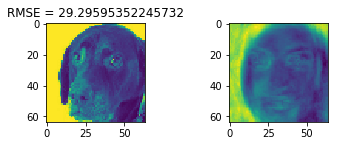

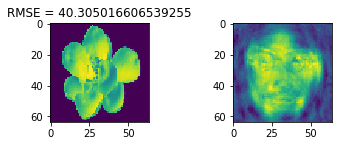

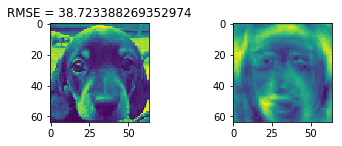

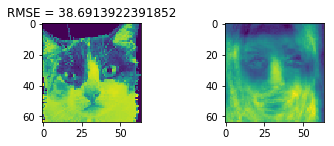

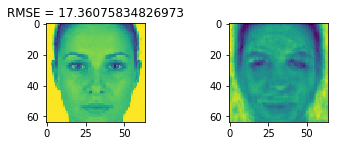

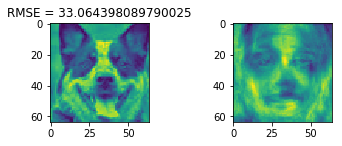

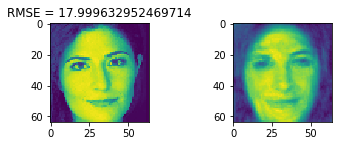

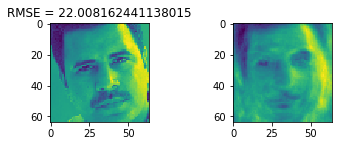

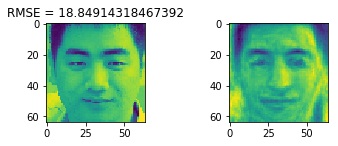

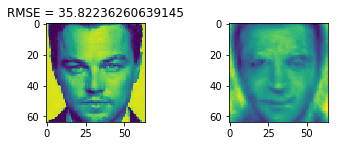

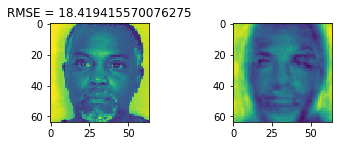

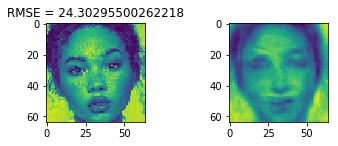

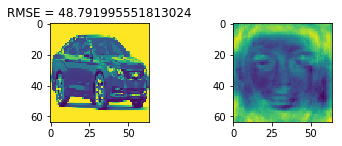

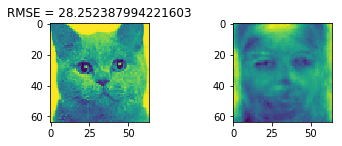

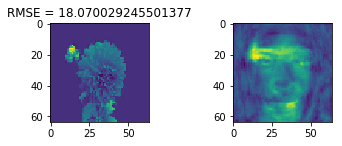

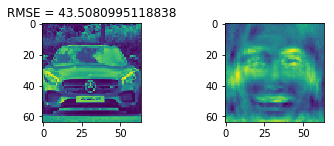

In [20]:
import os
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from math import sqrt

folder = "./additional_images/test_face_recognition/"

all_files = os.listdir(folder)
all_files=all_files[1:len(all_files)]


## TODO: choose n_components
scaler = StandardScaler()
pca = PCA(n_components=100, whiten=True)
pipe5 = Pipeline(steps=[('scaler', scaler), ('pca', pca)])
pipe5.fit(x, y_input)

## TODO: for every image project and reconstruct the image
## TODO: Plot each image and it reconstructed version
for i, f in enumerate(all_files):
    raw_image = cv2.imread(folder+f, flags=0)
    size_image = cv2.resize(raw_image, (64,64))
    flat_image = size_image.flatten().reshape(1,-1)
    transf_image = pipe5.transform(flat_image)
    final_image = pipe5.inverse_transform(transf_image).reshape(64,64)
    RMSE = sqrt(mean_squared_error(size_image, final_image))
    plt.figure()
    ax1 = plt.subplot(221)
    ax1.imshow(size_image)
    ax1.set_title("RMSE = " + str(RMSE))
    ax2 = plt.subplot(222)
    ax2.imshow(final_image)

In [33]:
from sklearn.cluster import MiniBatchKMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score
## TODO: cluster the data into 2 clusters and compare them with the gender target
y_gender = [0]*(699) + [1]*(699)

def clusterPred(X, y):
    accList = []
    
    kMeans = MiniBatchKMeans(n_clusters=2)
    y_kMeans = kMeans.fit_predict(X)
    acc_kMeans = accuracy_score(y, y_kMeans)
    accList.append(acc_kMeans)

    gMix = GaussianMixture(n_components=2)
    gMix.fit(X)
    y_gMix = gMix.predict(X)
    acc_gMix = accuracy_score(y, y_gMix)
    accList.append(acc_gMix)

    aggCl = AgglomerativeClustering(n_clusters=2)
    y_aggCl = aggCl.fit_predict(X)
    acc_aggCl = accuracy_score(y, y_aggCl)
    accList.append(acc_aggCl)

    #accList = [1-i if i <= 0.5 else i for i in accList]
    accList = pd.DataFrame(accList)
    accList.index = ['k-Means', 'Gauss. Mix', 'Agg. Clu.']
    return(accList)

rawAcc = clusterPred(x, y_gender)

scaler = StandardScaler()
scaler.fit(x)
x_scale = scaler.transform(x)
scaleAcc = clusterPred(x_scale, y_gender)

pca = PCA(n_components=100, whiten=True)
pca.fit(x_scale)
x_eige = pca.transform(x_scale)
eigeAcc = clusterPred(x_eige, y_gender)

finalAcc = pd.concat([rawAcc, scaleAcc, eigeAcc], axis=1)
finalAcc.columns = ['Raw Values', 'Scaled Only', 'Scaled and Transformed']
finalAcc

,Raw Values,Scaled Only,Scaled and Transformed
k-Means,0.335479,0.623748,0.472103
Gauss. Mix,0.352647,0.376252,0.613019
Agg. Clu.,0.424177,0.439914,0.499285


In [34]:
## TODO: train a pipeline to learn gender

scaler = StandardScaler()
pca = PCA(n_components=300, whiten=True)

pipeG = Pipeline(steps=[('scaler', scaler), ('pca', pca)])

x_transf = pipeG.fit_transform(x, y_gender)

rfc1 = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rfc1.fit(x_transf, y_gender)
imp_val = rfc1.feature_importances_
    
inp_ind = sorted(range(len(imp_val)), key=lambda i: imp_val[i])[-60:]
x_subset = pd.DataFrame(x_transf)[inp_ind]

rfc2 = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
rfc2.fit(x_subset, y_gender)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [35]:
import cv2
# We first load the trained AdaBoost model from opencv to recognize face
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
# We load one of our images
img = cv2.imread('./additional_images/test_gender_recognition/image1.jpg')
# We convert it to gray scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# We detect the faces on the image
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

# For each image we plot a rectangle around the face
for x, y, w, h in faces:
    # We plot the rectange
    cv2.rectangle(img,(x, y),(x + w, y + h),(255,0,0),2)
    # We write some text
    cv2.putText(img, "Picture", (x,y), cv2.FONT_HERSHEY_SIMPLEX,  1, (0, 255, 0), 2, cv2.LINE_AA)



In [36]:
import cv2
# We first load the trained AdaBoost model from opencv to recognize face
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
# We load one of our images
img = cv2.imread('./additional_images/test_gender_recognition/image1.jpg')
# We convert it to gray scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# We detect the faces on the image
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

/Users/macbookproi7/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


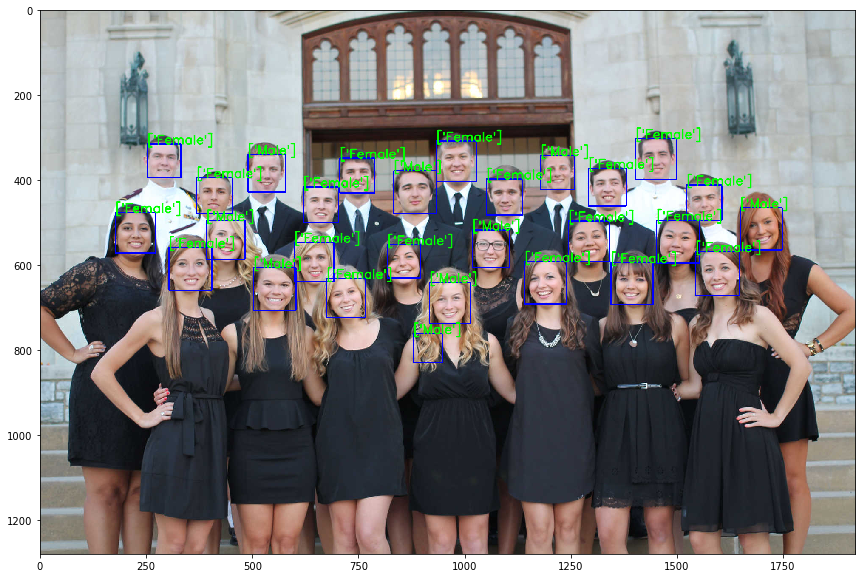

In [37]:
## TODO: Label the faces for each image.

# For each image we plot a rectangle around the face
for x, y, w, h in faces:
    # We plot the rectange
    cv2.rectangle(img,(x, y),(x + w, y + h),(255,0,0),2)
    image = gray[y:y+h, x:x+w]
    scale_image = cv2.resize(image, (64,64))
    ft_image = scale_image.flatten().reshape(1,-1)
    transf_image = pipeG.transform(ft_image)
    x_subset = pd.DataFrame(transf_image)[inp_ind]
    pred_image = rfc2.predict(x_subset)
    prediction = ['Male' if pred_image==0 else 'Female']
    # We write some text
    cv2.putText(img, str(prediction), (x,y), cv2.FONT_HERSHEY_SIMPLEX,  1, (0, 255, 0), 2, cv2.LINE_AA)

# We plot the resulting image
# Opencv reads images as BGR but matplotlib RGB images so we need to convert
plt.figure(figsize=(15,10))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

/Users/macbookproi7/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


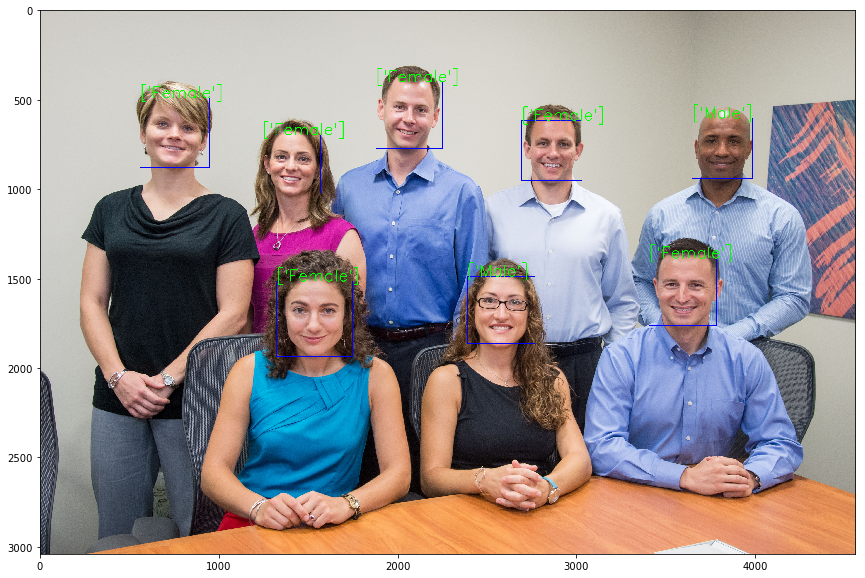

In [38]:
img = cv2.imread('./additional_images/test_gender_recognition/image2.jpg')
# We convert it to gray scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# We detect the faces on the image
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

# For each image we plot a rectangle around the face
for x, y, w, h in faces:
    # We plot the rectange
    cv2.rectangle(img,(x, y),(x + w, y + h),(255,0,0),2)
    image = gray[y:y+h, x:x+w]
    scale_image = cv2.resize(image, (64,64))
    f_image = scale_image.flatten().reshape(1,-1)
    transf_image = pipeG.transform(f_image)
    x_subset = pd.DataFrame(transf_image)[inp_ind]
    pred_image = rfc2.predict(x_subset)
    prediction = ['Male' if pred_image==0 else 'Female']
    # We write some text
    cv2.putText(img, str(prediction), (x,y), cv2.FONT_HERSHEY_SIMPLEX,  3, (0, 255, 0), 4, cv2.LINE_AA)

# We plot the resulting image
# Opencv reads images as BGR but matplotlib RGB images so we need to convert
plt.figure(figsize=(15,10))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

/Users/macbookproi7/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


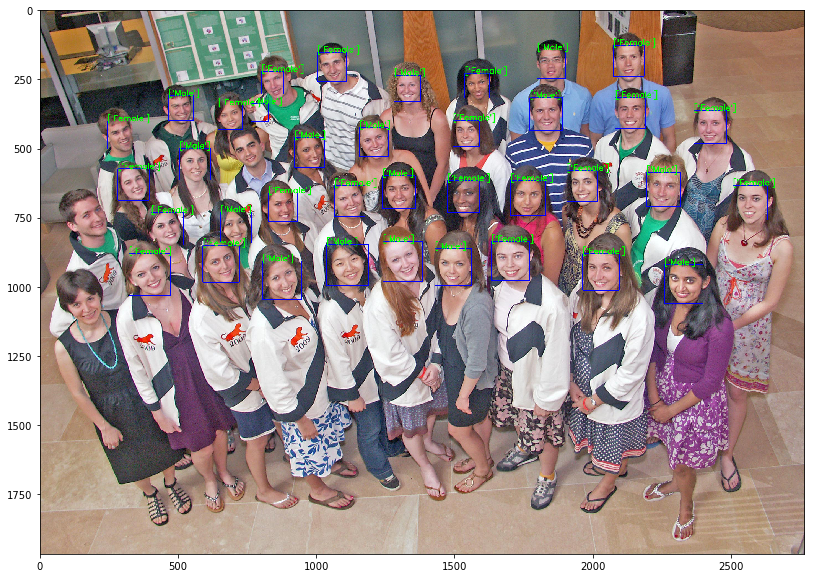

In [39]:
img = cv2.imread('./additional_images/test_gender_recognition/image3.jpg')
# We convert it to gray scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# We detect the faces on the image
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

# For each image we plot a rectangle around the face
for x, y, w, h in faces:
    # We plot the rectange
    cv2.rectangle(img,(x, y),(x + w, y + h),(255,0,0),2)
    image = gray[y:y+h, x:x+w]
    scale_image = cv2.resize(image, (64,64))
    f_image = scale_image.flatten().reshape(1,-1)
    transf_image = pipeG.transform(f_image)
    x_subset = pd.DataFrame(transf_image)[inp_ind]
    pred_image = rfc2.predict(x_subset)
    prediction = ['Male' if pred_image==0 else 'Female']
    # We write some text
    cv2.putText(img, str(prediction), (x,y), cv2.FONT_HERSHEY_SIMPLEX,  1, (0, 255, 0), 2, cv2.LINE_AA)

# We plot the resulting image
# Opencv reads images as BGR but matplotlib RGB images so we need to convert
plt.figure(figsize=(15,10))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))